In [1]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
path_train_data = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist-rot_training_data.mat"
path_train_label = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist-rot_training_label.mat"
path_test_data = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist-rot_test_data.mat"
path_test_label = "R:/IISc/Sem 2/PRNN/Assignments/assignment-3-files/MNIST/mnist-rot_test_label.mat"

In [4]:
train_data_mat = loadmat(path_train_data)
train_data = train_data_mat['train_data']

train_label_mat = loadmat(path_train_label)
train_label = train_label_mat['train_label']

test_data_mat = loadmat(path_test_data)
test_data = test_data_mat['test_data']

test_label_mat = loadmat(path_test_label)
test_label = test_label_mat['test_label']

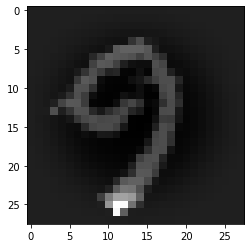

In [5]:
plt.imshow(train_data[0], cmap='gray')

In [6]:
train_data = train_data.reshape(train_data.shape[0], 784)
test_data = test_data.reshape(test_data.shape[0], 784)
train_label = train_label.T
test_label = test_label.T

In [7]:
train_label.shape

(12000, 1)

In [8]:
train_data.shape

(12000, 784)

In [9]:
# from sklearn.model_selection import train_test_split
# train_data, _, train_label, _ = train_test_split(train_data, train_label, test_size=0.6)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)
# X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
# X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [11]:
X_train.shape

(12000, 784)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(train_label).toarray()
y_test = ohe.fit_transform(test_label).toarray()

In [22]:
lam = tf.keras.regularizers.l2(l=0.01)
init = tf.initializers.he_normal()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=784, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.LeakyReLU(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(128, kernel_initializer=init, kernel_regularizer=lam),
    tf.keras.layers.LeakyReLU(0.1),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    # tf.keras.layers.Dense(64, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.2),

    # tf.keras.layers.Dense(32, kernel_initializer=init, kernel_regularizer=lam),
    # tf.keras.layers.ReLU(),
    # tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [23]:
# lam = tf.keras.regularizers.l1(l=0.001)
# # lam_2 = tf.keras.regularizers.l2(l=0.01)
# init = tf.initializers.he_normal()
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(8, (3, 3), padding='same', kernel_initializer=init, input_shape=(28, 28, 1), kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.Conv2D(16, (3, 3), padding='same', kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.MaxPool2D((2, 2)),

#     tf.keras.layers.Conv2D(32, (3, 3), padding='same', kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.Conv2D(64, (3, 3), padding='same', kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.MaxPool2D((2, 2)),

#     tf.keras.layers.Conv2D(96, (3, 3), padding='same', kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.Conv2D(128, (3, 3), padding='same', kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.BatchNormalization(),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),

#     tf.keras.layers.MaxPool2D((2, 2)),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Dense(64, kernel_initializer=init, kernel_regularizer=lam),
#     # tf.keras.layers.ReLU(),
#     tf.keras.layers.LeakyReLU(0.1),
#     tf.keras.layers.Dropout(0.2),
    
#     tf.keras.layers.Dense(10, activation='softmax', kernel_initializer=init, kernel_regularizer=lam)
# ])
# model.summary()

In [24]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(patience=5)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1)

In [26]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_valid, y_valid), shuffle=True, callbacks=[])

Epoch 1/100
304/304 [==============================] - 2s 4ms/step - loss: 5.0259 - accuracy: 0.3499 - val_loss: 2.9175 - val_accuracy: 0.5806
Epoch 2/100
304/304 [==============================] - 1s 3ms/step - loss: 2.5735 - accuracy: 0.5913 - val_loss: 1.9236 - val_accuracy: 0.6343
Epoch 3/100
304/304 [==============================] - 1s 3ms/step - loss: 1.7654 - accuracy: 0.6584 - val_loss: 1.5100 - val_accuracy: 0.6907
Epoch 4/100
304/304 [==============================] - 1s 3ms/step - loss: 1.4471 - accuracy: 0.6910 - val_loss: 1.3504 - val_accuracy: 0.7056
Epoch 5/100
304/304 [==============================] - 1s 3ms/step - loss: 1.2505 - accuracy: 0.7263 - val_loss: 1.3123 - val_accuracy: 0.6898
Epoch 6/100
304/304 [==============================] - 1s 3ms/step - loss: 1.1778 - accuracy: 0.7406 - val_loss: 1.2631 - val_accuracy: 0.7222
Epoch 7/100
304/304 [==============================] - 1s 3ms/step - loss: 1.1342 - accuracy: 0.7586 - val_loss: 1.2132 - val_accuracy: 0.7361

In [27]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 80.64


<AxesSubplot:>

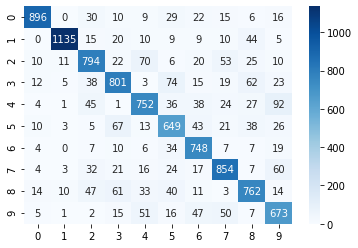

In [29]:
sns.heatmap(confusion_matrix(pred, test), annot=True, fmt='g', cmap='Blues')

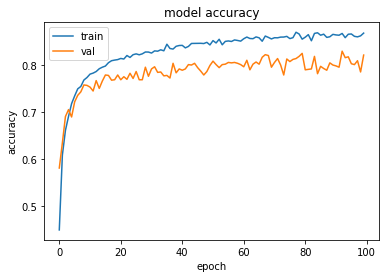

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.xticks([i for i in range(25)])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

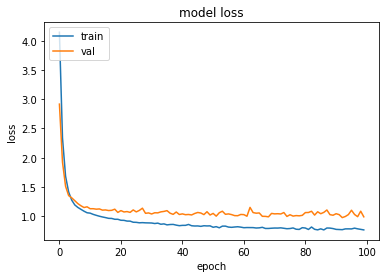

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.xticks([i for i in range(25)])
plt.legend(['train', 'val'], loc='upper left')
plt.show()